IMPORT ALL THE REQUIRED LIBRARIES 

In [4]:
# import all the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
# ! pip uninstall nltk
# ! pip install -U nltk
import nltk
import os
import json
import math
import csv
import joblib

#from IPython.core.interactiveshell import InteractiveShell 

# import for text and natural language processing
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

# install machine learning libraries and models required 
! pip install surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from surprise.model_selection import cross_validate
from surprise import SVD, NMF, CoClustering, KNNWithMeans



You should consider upgrading via the 'C:\Users\User\Desktop\Coding\Recommender_System_A_I_Project\venv\Scripts\python.exe -m pip install --upgrade pip' command.







THE DATA IS READ, PROCESSED INTO CSV FORMAT AND STORED AS A PANDAS DATAFRAME
EXPLORATORY DATA ANALYSIS IS PERFORMED ON THE DATA 

In [6]:
# DATE PREPROCESSING
# Accessing the dataset and picking 
elect_data = pd.read_csv('electronics_dataset.csv')

# Exploratory Data Analysis to show some information about the overall dataset

# view the first ten columns from the dataset
elect_data.head(10)

# view the number of rows and columns in the dataset
elect_data.shape

# view the datatypes of the data columns present in the dataset
elect_data.dtypes

# view the other information about the dataset
elect_data.describe()
elect_data.info()

print(elect_data.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

MOUNT GOOGLE DRIVE TO ACCESS SAVED NOTEBOOK FILE FROM PERSONAL DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXPLORATORY DATA ANALYSIS

In [7]:
#create a new datset with only the columns that are relevant to the analysis and needed to create a recommender system
elect_data = elect_data[['reviews.username','id', "reviews.rating","reviews.text"]]
print(type(elect_data))

# Exploratory Data Analysis to show some information about the new dataset

# view the first ten columns from the dataset
elect_data.head(10)

# view the number of rows and columns in the dataset
elect_data.shape

# view the datatypes of the data columns present in the dataset
elect_data.dtypes

# view the summary of the dataset
elect_data.info()

# View the statistical distribution numerical varaibles
elect_data.describe()



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.username  7299 non-null   object 
 1   id                7299 non-null   object 
 2   reviews.rating    7135 non-null   float64
 3   reviews.text      7294 non-null   object 
dtypes: float64(1), object(3)
memory usage: 228.2+ KB


,reviews.rating
count,7135.000000
mean,4.371969
std,1.038561
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


THERE ARE SOME DUPLICATE VALUES IN THE DATASET WHICH NEED TO BE DROPPED 

In [ ]:
# FIND ALL THE DUPLICATE VALUES ACROSS THE DATASET
duplicates = elect_data.duplicated(keep=False)
duplicate_rows = elect_data[duplicates]

# Check to see if duplicate values exist in the dataset
if not duplicate_rows.empty:
    print("Duplicate values found in the dataset.")

# Find the total number of duplicate values in the dataset
num_duplicates = elect_data.duplicated().sum()
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate values in the dataset.")

# Drop the dupplicate values across all the columns in the datset
elect_data.drop_duplicates(subset=['reviews.username','id', "reviews.rating","reviews.text"], inplace=True)


Duplicate values found in the dataset.
There are 39 duplicate values in the dataset.


In [ ]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 0 to 7298
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.username  7260 non-null   object 
 1   id                7260 non-null   object 
 2   reviews.rating    7121 non-null   float64
 3   reviews.text      7255 non-null   object 
dtypes: float64(1), object(3)
memory usage: 283.6+ KB


THE DATASET HAS SOME NULL VALUES THAT MAY NEGATIVELY AFFECT THE ANALYSIS. SO WE ANALYZE THE DISTRIBUTION OF THE NULL VALUES ACROSS THE COLUMNS AND REPLACE THEM

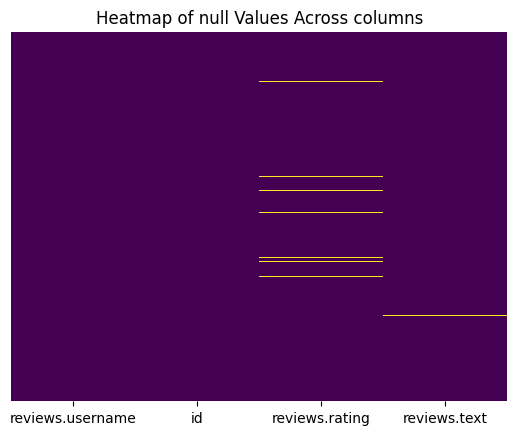

In [8]:
# check for null values in the dataset and store in a variable 
null_colls = elect_data.isnull()
null_colls.sum()

# visializing the null values in the dataset with a heatmap
sns.heatmap(null_colls,yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap of null Values Across columns")

# Calculate the mean of the ratings column as it contains numerical data and replace null values of the ratings column with the mean
mean = elect_data['reviews.rating'].mean()
elect_data['reviews.rating'].fillna(mean, inplace=True)

# replace the null values of the reviews column with the 'NaN' string as it's of string datatype
elect_data['reviews.text'].fillna("NaN", inplace=True)



VIEW THE DISTRIBUTION OF RATINGS IN A PIE CHART

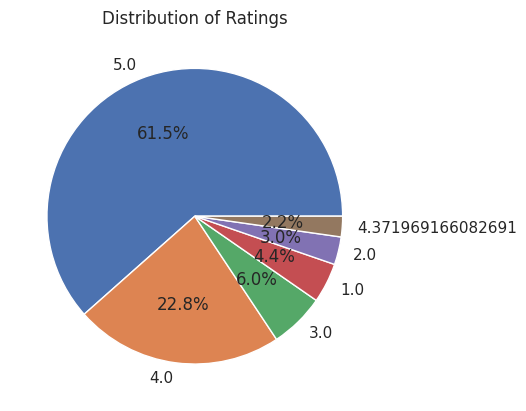

In [ ]:
rating_counts = elect_data['reviews.rating'].value_counts()

# Create a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Ratings')

# Display the chart
plt.show()

VIEW THE DISTRIBUTION OF THE RATINGS ACROSS THE ELECTRONIC PRODUCTS IN A PIE CHART

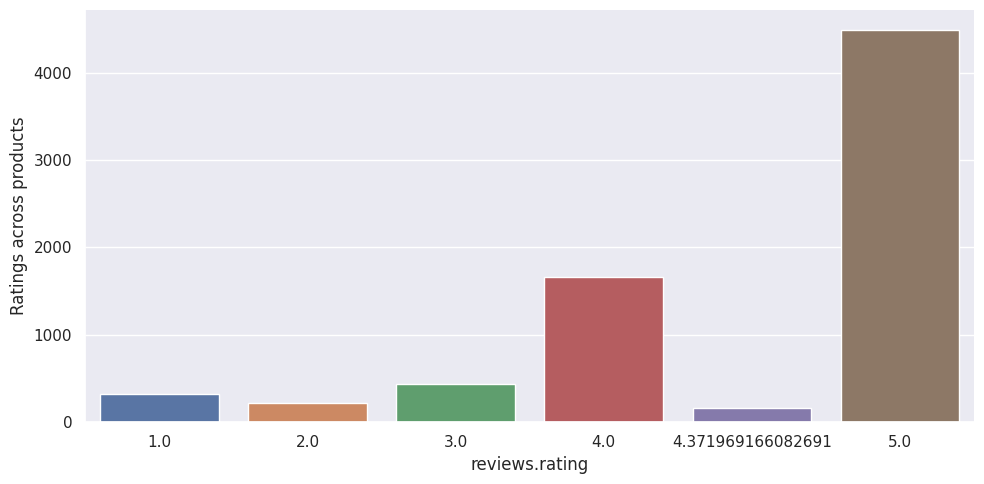

In [ ]:

# set the theme style for the seaborn plot
sns.set_theme(style="darkgrid")

# plot the ratings column on the x axis
fig = sns.catplot(data=elect_data, x="reviews.rating",aspect=2.0, kind='count')
fig.set_ylabels("Ratings across products")
    

WE CAN SEE THAT THE DISTRIBUTION OF THE RATINGS IS NOT EVEN. SOME PRODUCTS HAVE MORE RATINGS THAN OTHERS. THIS IS BECAUSE SOME USERS HAVE RATED MULTIPLE PRODUCTS AND VICE-VERSA SO WE NEED TO CHECK THE NUMBER OF UNIQUE USERS WHO HAVE RATED THE PRODUCTS AND ALSO THE NUMBER OF UNIQUE PRODUCTS THAT HAVE BEEN RATED BY THE USERS


In [ ]:
# find the unique user reviews
unique_user_reviews = np.unique(elect_data['reviews.username'])

# find the length of the unique user reviews
len_unique_user_reviews = len(unique_user_reviews)

print("The number of actual users in the dataset is: ", len_unique_user_reviews)

# find the unique products
unique_products = np.unique(elect_data['id'])

# find the number of unique products
no_unique_products = len(unique_products)

print("The number of unique products in the dataset is: ", no_unique_products)




The number of actual users in the dataset is:  6493
The number of unique products in the dataset is:  50


TO TRAIN THE MODEL, THE REVIIEWS TEXT NEEDS TO BE PREPROCESSED AND CONVERTED INTO A SUITABLE FORMAT FOR THE COMPUTER TO USE IT.

In [ ]:
# store the users' reviews in a variable
user_reviews = elect_data['reviews.text']

reviews_text = elect_data.iloc[: , [3]]

# The reviews text are contained in the 21st column of the dataset so all the other columns will be dropped
print(reviews_text)


                                           reviews.text
0     This keyboard is very easy to type on, but the...
1     It's thin and light. I can type pretty easily ...
2     I love the new design the keys are spaced well...
3     Attached easily and firmly. Has a nice feel. A...
4     Our original keyboard was okay, but did not ha...
...                                                 ...
7294  This remote was a decent replacement for my lo...
7295  This looks good on my celling. Flushes very we...
7296  Great Plate for projector mount, very easy to ...
7297  This mount worked very well for me when I used...
7298  It's a nice solid mounting plate check and mak...

[7260 rows x 1 columns]


CREATE SEPERATE FILES TO STORE THE TEXT FROM THE REVIEWS COLUMN

In [ ]:
# create two files to store the input dataset and resulting output dataset
data_input = "electronics_dataset.csv"
data_output = "output_data.csv"

# create a new dataframe with only the reviews text column and store it in a csv file
df = elect_data.loc[: , ["reviews.text"]]
df.to_csv('output_data.csv', index=False)

 CONVERT THE REVIEWS CSV FILE INTO A TEXT FILE TO STORE THE REVIEWS AS TEXT

In [ ]:
with open ("reviews.txt", "w", encoding="utf-8") as new_file:
    writer = csv.writer(new_file)
    # for val in df["reviews.text"]:
    #     writer.writerow([val])
    
    with open("output_data.csv", encoding="utf-8") as old_file:
        for row in csv.reader(old_file):
            writer.writerow(row)
    
    # with open("output_data.csv") as old_file:
    #     [new_file.write(" ".join(row)+'\n') for row in csv.reader(old_file)]

    # new_file.close()

TO MAKE THE REVIEWS TEXT MORE MEANINGFUL TO A MACHINE, THE STOPWORDS ARE REMOVED USING THE NLTK LIBRARY AS THEY ADD LITTLE MEANING TO THE OVERALL TEXT.

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

with open("output_data.csv", "r", encoding="utf-8") as csv_file, open("stpw_deleted.csv", "w", newline='', encoding="utf-8") as stop_word_file:
    word_writer = csv.writer(stop_word_file)
    word_reader = csv.reader(csv_file, delimiter=",")
    stpw_counter = 0
    for lines in word_reader:
        for txt_line in lines:
            txt_words = txt_line.split()
            filtered_words = [w for w in txt_words if w.lower() not in stop_words]
            stpw_counter += len(txt_words) - len(filtered_words)
            word_writer.writerow(filtered_words)
       
print("The number of stopwords in the dataset is: ", stpw_counter)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The number of stopwords in the dataset is:  184217


THE NEXT STEP IS TO SHARE THE SENTENCES OF THE REVIEWS INTO DIFFERENT PARTS OF SPEECH USING NLTK'S PARTS OF SPEECH TAGGER(POS TAGGING). THIS WILL HELP THE MACHINE TO UNDERSTAND THE MEANING OF THE SENTENCES BETTER 

In [ ]:
nltk.download("averaged_perceptron_tagger")
with open('output_data.csv', "r", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for tokens in csv_reader: 
        print("POS::")
        tagged_tokens = nltk.pos_tag(tokens)
        print(tagged_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Streaming output truncated to the last 5000 lines.
POS::
[('I would recommend this product for anyone wanting to upgrade th sound in their car from the factory installed speakers.', 'NN')]
POS::
[('Paired with my Alpine 6x9 speakers, the sound in my car is fantastic!', 'NN')]
POS::
[('Good after market speakers and the sound is noticeable.', 'NN')]
POS::
[('Overall great buy. There are cheaper speakers but hard to find same sound quality.', 'NN')]
POS::
[('Got these speakers along with a new Alpine radio for my truck. They sound great!', 'NN')]
POS::
[('Good sounding speakers for a good price. I have them in the doors', 'NNS')]
POS::
[('was as decribed', 'NN')]
POS::
[('The tech that installed stereo in truck was awesome that is one reason I buy from Best Buy!!!Best Buy does not need to lose him!! Very professional!!', 'NN')]
POS::
[('Great speakers. Beats buying 10 speakers, amp etc...', 'NN')]
POS::
[('These speakers are perfect.Clean, crisp soundInstallation was easy', 'NN')]
POS::


TO MAKE THE WORDS IN THE REVIEWS TEXT EVEN MORE MEANINGFUL TO THE MACHINE, WE USE STEMMING TO REDUCE THE WORDS TO THEIR ROOT FORMS. STEMMING IS A PROCESS OF REDUCING THE WORDS TO THEIR ROOT FORMS BY REMOVING THE ENDINGS OF THE WORDS. FOR EXAMPLE, THE WORDS 'RUNNING', 'RUNS', 'RUNNER' ARE ALL REDUCED TO THE ROOT FORM 'RUN'. THIS WILL HELP THE MACHINE TO UNDERSTAND THE MEANING OF THE WORDS BETTER.

In [ ]:
# create a Porter Stemmer object
porter = PorterStemmer()

with open('electronics_dataset.csv', "r", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    print("Porter Stemmer::")
    for lines in csv_reader: 
        for word in lines:
            print(word, porter.stem(word))



FIND THE TOTAL NUMBER OF STOPWORDS IN THE COLLECTION OF REVIEWS TEXT

In [ ]:
# store the pool of english stopwords in a variable
stop_words = set(stopwords.words('english'))

# read the reviews text csv file 
with open ("output_data.csv", "r", encoding="utf-8") as csv_file:
    word_reader = csv.reader(csv_file, delimiter=",")
    for lines in word_reader:
        txt_line = csv_file.read()
        txt_words = txt_line.split()
        
stpw_counter = 0
        
# add all words that are not stopwords to a list      
for w in txt_words:
    if w.lower() not in stop_words:
        stop_word_file = open("stpw_deleted.csv", "a")
        stop_word_file.write(" " + w)
        stop_word_file.close()
    else:
        stpw_counter += 1
       
print("The number of stopwords in the dataset is: ", stpw_counter)


The number of stopwords in the dataset is:  182149


THE NEXT STEP IS TO DROP THE REVIEWS TEXT COLUMN FROM THE DATSET AS IT IS NOT REQUIRED FOR BUILDING THE RECOMMENDER SYSTEM BECAUSE THE SUPRISE LIRARY'S READER METHODS FOR RATINGS DATASET REQUIRES ONLY THREE COLUMNS IN A DATASET("USERID", "ITEMID", "RATING")

In [ ]:
elect_data.drop(["reviews.text"], axis=1, inplace=True)

print(elect_data.columns)

elect_data.shape

Index(['reviews.username', 'id', 'reviews.rating'], dtype='object')


(7260, 3)

TO KNOW WHAT USER RATED A PRODUCT THE USER RATINGS ARE GROUPED FOR EACH USER WITH THEIR USERNAMES IN THE DATAFRAME


In [10]:
rating_groups = elect_data.groupby(by="reviews.username")["reviews.rating"].count()
ratings_per_user = rating_groups.sort_values(ascending=False)
ratings_per_user.head(10)

# show the statistics of the user product ratings 
ratings_per_user.describe()

# Show the number of users who have rated 10 or more products
popular_products_per_user = sum(ratings_per_user >= 10)

print(f"\nusers with more than 10 product recommendations:{popular_products_per_user}")

# plot products agaisnt their ratings
# create a dataframe for products with 20 or more ratings
ratings_df = elect_data.groupby("id").filter(lambda x: x["reviews.rating"].count() >= 20)

# show the number product ratings in ascending order
ratings_per_product = ratings_df.groupby("id")["reviews.rating"].count().sort_values(ascending=True)
# print(ratings_per_product)



   


users with more than 10 product recommendations:11


CREATE LINE GRAPH TO SHOW PRODUCT RATINGS

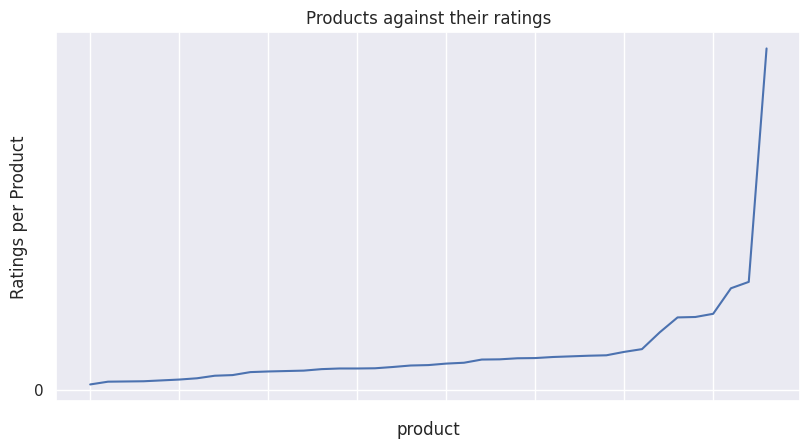

In [ ]:
#CREATE PLOT
fig = plt.figure(figsize=plt.figaspect(.5))

# get the axes for the plot
axes = plt.gca()

# title the plot
plt.title("Products against their ratings")

plt.plot(ratings_per_product.values)
# define the labels for the x and y axes
plt.xlabel("product")
plt.ylabel("Ratings per Product")
plt.yticks(np.arange(0 , 0.005))
axes.set_xticklabels([])
plt.show()



FIND THE POPULAR PRODUCTS RATED BY MOST USERS AND PLOT A BAR CHART TO SHOW 25 MOST POPPULAR PRODUCTS

<Axes: title={'center': 'Popular Product Ratings'}, ylabel='id'>

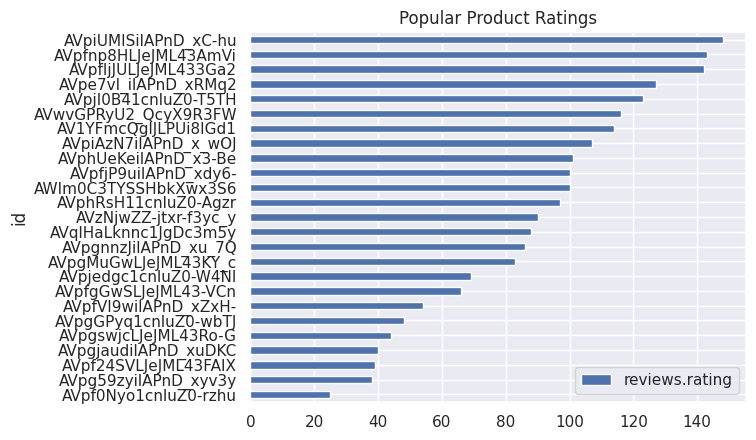

In [ ]:
# list and group the most popular products 
pop_prod_df = pd.DataFrame(ratings_df.groupby("id")["reviews.rating"].count())
most_pop = pop_prod_df.sort_values("reviews.rating", ascending=True)

# pop_prod_df.head(10)
# print(most_pop)

# plot the 25 most popularly rated products
most_pop.head(25).plot(kind="barh", title="Popular Product Ratings")

CREATING RECOMMENDER SYSTEM BASED ON COLLABERATIVE FILTERING USING THE SUPRISE LIBRARY



GROUP USERS BASED ON THE ITEMS THEY HAVE RATED

In [ ]:
# Create a dataframe of users who have rated 10 or more products

data_df = elect_data.groupby("id").filter(lambda x: x["reviews.rating"].count() >= 10)
data_df.head()

# Create a reader object from the reader class and set the rating scale used for the recommeder system 
reader = Reader(rating_scale=(1,5))

# use the reader class from the surprise library to load the dataframe and parse the ratings from the new dataframe
# this will form the data to be used for splitting and fitting the machine learning model
read_data = Dataset.load_from_df(data_df, reader)

SPLITTING DATASET INTO TRAIN AND TEST DATA WITH 70/30 RATIO 

In [ ]:
# splittig the dataset into train and test data to fit and evaluate the model.
train_data, test_data = train_test_split(read_data, test_size=0.30, random_state=10)


COLLABORATIVE FILTERING USING (PERSON SIMILARITY)
COMBINING SIMILAR USERS BASED ON SHARED ITEM INTEREST USING PEARSON_BASED SIMILARITY 

In [ ]:
# Applying item based collaborative filtering to dataset with pearson based similarity to create model
prediction_model = KNNWithMeans(K=6, sim_options={"name":"pearson_baseline", "user_based":False})

# Using the train data from the dataset to fit the KNN model
prediction_model.fit(train_data)

# Test the KNN model with the test data from the dataset
test_estimation = prediction_model.test(test_data)
test_estimation

#  Perform cross-validation and print the evaluation metrics
from surprise.model_selection import cross_validate
results = cross_validate(prediction_model, read_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0018  1.0840  1.0043  1.0911  1.0262  1.0415  0.0386  
MAE (testset)     0.7436  0.7961  0.7459  0.8033  0.7579  0.7694  0.0254  
Fit time  

COLLABORATIVE FILTERING USING (COSINE SIMILARITY). COMBINING SIMILAR USERS BASED ON SHARED ITEM INTEREST

In [ ]:
# Applying item based collaborative filtering to dataset with cosine similarity to create model
prediction_model = KNNWithMeans(K=6, sim_options={"name":"cosine", "user_based":False})

# Using the train data from the dataset to fit the KNN model
prediction_model.fit(train_data)

# Test the KNN model with the test data from the dataset
test_estimation_2 = prediction_model.test(test_data)
test_estimation_2

#  Perform cross-validation and print the evaluation metrics
from surprise.model_selection import cross_validate
results = cross_validate(prediction_model, read_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0554  1.0147  1.0221  1.0246  1.0834  1.0401  0.0258  
MAE (testset)     0.7806  0.7512  0.7582  0.7589  0.7938  0.7685  0.0160  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    
{'test_rmse': array([1.05543133, 1.01473612, 1.02206925, 1.02463497, 1.0833953 ]), 'test_mae': array([0.78

In [ ]:
# Applying item based collaborative filtering to dataset with  pearson based similarityy to create model
# Here the clusters are reduced to just 3
prediction_model = KNNWithMeans(K=3, sim_options={"name":"pearson_baseline", "user_based":False})

# Using the train data from the dataset to fit the KNN model
prediction_model.fit(train_data)

# Test the KNN model with the test data from the dataset
test_estimation_3 = prediction_model.test(test_data)
test_estimation_3

#  Perform cross-validation and print the evaluation metrics
from surprise.model_selection import cross_validate
results = cross_validate(prediction_model, read_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0542  1.0701  1.0505  1.0035  1.0159  1.0389  0.0250  
MAE (testset)     0.7735  0.7845  0.7744  0.7508  0.7568  0.7680  0.0124  
Fit time  

CROSS-VALIDATION OF CHOSEN MACHINE LEARNING MODELS FOR PERFORMANCE USING THE CROSS-VALIDATE METHOD FROM THE SURPRISE LIBRARY


In [ ]:

# 1. SVD (Singular Value Decomposition)
# 2. NMF (Non-negative Matrix Factorization)
# 3. CoClustering (Co-Clustering)

# Load your dataset
reader = Reader(rating_scale=(1, 5))
data = read_data

# SVD
svd = SVD()
svd_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# NMF
nmf = NMF()
nmf_results = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# CoClustering
coclustering = CoClustering()
coclustering_results = cross_validate(coclustering, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# KNNWithMeans
knnwithmeans = KNNWithMeans()
knnwithmeans_results = cross_validate(knnwithmeans, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9737  0.9837  0.9703  1.0464  0.9945  0.9937  0.0277  
MAE (testset)     0.7202  0.7125  0.7191  0.7414  0.7374  0.7261  0.0112  
Fit time          0.26    0.11    0.11    0.11    0.12    0.14    0.06    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0289  1.0408  1.1181  1.0666  1.0488  1.0607  0.0312  
MAE (testset)     0.7827  0.7866  0.8349  0.8032  0.7839  0.7982  0.0198  
Fit time          0.67    0.89    0.88    0.86    0.88    0.83    0.08    
Test time         0.02    0.02    0.01    0.01    0.02    0.02    0.00    
Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE

DISPLAYING THE RESULTS OF CROSS VALIDATION FOR AL THE MODELS IN A FORMATTED WAY AND PLOTTING THE RESULTS IN A BAR CHART FOR VISUAL COMPARISM.

Cross-validation results:
SVD
RMSE: 0.9935 +/- 0.0116
MAE: 0.7263 +/- 0.0065

NMF
RMSE: 1.0557 +/- 0.0169
MAE: 0.7947 +/- 0.0109

CoClustering
RMSE: 1.0446 +/- 0.0388
MAE: 0.7720 +/- 0.0202

KNNWithMeans
RMSE: 1.0527 +/- 0.0231
MAE: 0.7756 +/- 0.0113


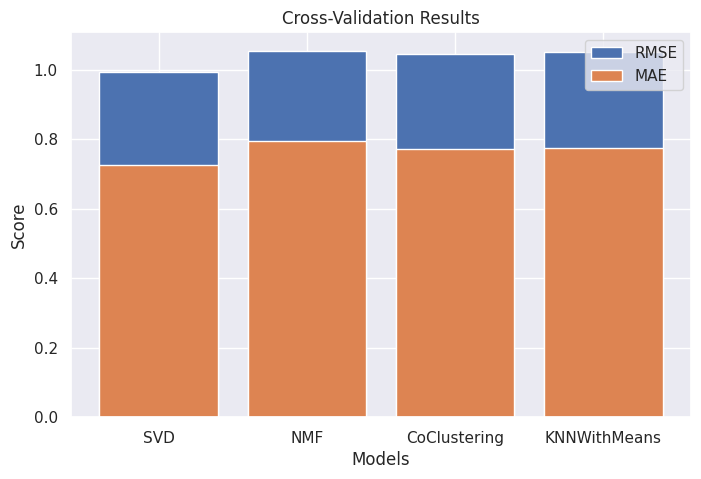

In [ ]:
# Display the results
print("Cross-validation results:")
print("SVD")
print(f"RMSE: {svd_results['test_rmse'].mean():.4f} +/- {svd_results['test_rmse'].std():.4f}")
print(f"MAE: {svd_results['test_mae'].mean():.4f} +/- {svd_results['test_mae'].std():.4f}\n")

print("NMF")
print(f"RMSE: {nmf_results['test_rmse'].mean():.4f} +/- {nmf_results['test_rmse'].std():.4f}")
print(f"MAE: {nmf_results['test_mae'].mean():.4f} +/- {nmf_results['test_mae'].std():.4f}\n")

print("CoClustering")
print(f"RMSE: {coclustering_results['test_rmse'].mean():.4f} +/- {coclustering_results['test_rmse'].std():.4f}")
print(f"MAE: {coclustering_results['test_mae'].mean():.4f} +/- {coclustering_results['test_mae'].std():.4f}\n")

print("KNNWithMeans")
print(f"RMSE: {knnwithmeans_results['test_rmse'].mean():.4f} +/- {knnwithmeans_results['test_rmse'].std():.4f}")
print(f"MAE: {knnwithmeans_results['test_mae'].mean():.4f} +/- {knnwithmeans_results['test_mae'].std():.4f}")

# Compare the results in a plot
models = ['SVD', 'NMF', 'CoClustering', 'KNNWithMeans']
rmse_scores = [svd_results['test_rmse'].mean(),
               nmf_results['test_rmse'].mean(),
               coclustering_results['test_rmse'].mean(),
               knnwithmeans_results['test_rmse'].mean()]
mae_scores = [svd_results['test_mae'].mean(),
              nmf_results['test_mae'].mean(),
              coclustering_results['test_mae'].mean(),
              knnwithmeans_results['test_mae'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_scores, label='RMSE')
plt.bar(models, mae_scores, label='MAE')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.show()

PIVOTING THE RATINGS AND USERNAME COLUMN

In [11]:
# create a new dataframe from the first 1000 entries from the ratings dataframe
new_df = ratings_df.head(1000)

# create a pivot table of the electronic products ordered by usernames, showing each user's ratings for the product resulting in a matrix
matrix = new_df.pivot_table(values="reviews.rating", index="reviews.username", columns="id", fill_value=0, aggfunc="first")

# view the first 5 items of the resulting matrix
# the resulting matrix is a sparse matrix as it consists of mostly zeros
sparse_matrix = matrix
sparse_matrix.head()


# Transpose the matrix so the columns an rows are inverted such that it shows the rating engagements of each user
trans_matrix = sparse_matrix.T
trans_matrix.head()

reviews.username,007Shaii,232323,2leo2,370zNismo,3a5yr1d3r,427Cobra,500MPL,A.R.,A199578,AAAA,...,wai,wase4711,weeping,wendyb111,willyboy,wj816,xc1097,xxclusivxx,yoda37,zznj
id,,,,,,,,,,,,,,,,,,,,,
AV1YFmcQglJLPUi8IGd1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpf3txeLJeJML43FN82,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.371969,5.0,0.0,...,0.0,0.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0
AVpfnp8HLJeJML43AmVi,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.000000,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpgMuGwLJeJML43KY_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphzgbJLJeJML43fA0o,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.000000,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


REDUCE THE DIMENSIONS OF THE RESULTING MATRIX TO THE MOST IMPORTANT FEATURES/LATENT FACTORS TO REDUCE NOISE/OFFSET VALUES AND MAKING THE DATASET EASIER TO ANALYZE 


In [12]:
SVD = TruncatedSVD(n_components=8)
dec_matrix = SVD.fit_transform(trans_matrix)

CREATE A CORRELATION MATRIX FROM THE RESULTING DECOMPOSED MATRIX TO SHOW THE DERGREE OF RELATIONSHIP/CORRELATION BETWEEN THE 8 FEATURS IN THE DATASET.

In [13]:
corr_matrix = np.corrcoef(dec_matrix)
# d=trans_matrix.index[5]

CREATE A RECOMMENDER FUNCTION THAT TAKES IN THE PRODUCT ID OF AN ITEM THE USER HAS REVIEWED PREVIOUSLY AND RECOMMEND THE THREE MOST SIMILAR PRODUCTS TO THAT PRODUCT.


In [14]:
def recommend_similar_products(item_id:str)->str:
  # item_id = "AWIm0C3TYSSHbkXwx3S6"
  """This function receives an id of product previously reviewed  by a user and recommends 3 most similar product"""
  products = list(trans_matrix.index)
  item_index = products.index(item_id)
  # print(f"Item index: {item_index}")
  # find all items correlated with the item purchased by user
  corr_items = corr_matrix[item_index]
  corr_items

  similar_items = trans_matrix.index[corr_items > -0.20858196]
  most_corr_products = list(similar_items)

  # remove the item the user already purchased from the list of correlated items
  most_corr_products.remove(item_id)

  # recommend the 4 most similar products to the electronic purchased by the user
  print(most_corr_products[0:3])


recommend_similar_products("AWIm0C3TYSSHbkXwx3S6")

['AVpf3txeLJeJML43FN82', 'AVpfnp8HLJeJML43AmVi', 'AVphzgbJLJeJML43fA0o']
